# Whats up gamers

today i will be using my powers of data science for evil (aka, fun). I've gotten my hands on a little dataset about Cannabis Strains, types, flavors, and ratings. 

## The goal
I have a few ideas brewing in the background, but I would first like to just play with some of the api's that deal with cannabis / terpine information. First, I want to explore the dataset and find some correlation between strains. 

Then, I want to use this data set and some clever programming in order to map different strains to the Minor arcana of Tarot. The biggest issue about this is mapping the effects / flavors to the actual meanings of the cards. That's what makes it fun!

## The dataset
[Cannabis Species EDA and Models Pipeline](https://www.kaggle.com/code/kabure/cannabis-species-eda-and-models-pipeline)

First, lets import this sucker and take a lil peak at what's inside, and clean up any null values!

In [51]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

# NLP and Word Cloud
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import csv
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS



In [23]:
df = pd.read_csv("./input/cannabis.csv")

In [24]:
print(df.shape)
print(df.isnull().sum())
print(df.info())
df.head(n=6)

(2351, 6)
Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...


In [25]:
# Replace missing values with 'None'
df.fillna('None', inplace=True)

print(df.shape)
print(df.isnull().sum())

(2351, 6)
Strain         0
Type           0
Rating         0
Effects        0
Flavor         0
Description    0
dtype: int64


# Exploring the Data

For funzies, lets explore the cannabis data and uncover any interesting relationships.

1. Distribution of Types: Visualize the distribution of different types of cannabis strains. This will give us an overview of the proportions of each type in your dataset.

2. Rating Analysis: Explore the ratings of cannabis strains, visualize the distribution of ratings and identify any patterns or outliers.

3. Effects Analysis: Analyze the effects of different cannabis strains. 

4. Flavor Profiles by Type: Compare the flavor profiles of different types of cannabis strains. You can create a stacked bar chart or a grouped bar chart to show the distribution of flavors for each strain type. This will help you understand the flavor preferences within each strain type.

5. Description Analysis: Analyze the descriptions of cannabis strains to uncover common themes or keywords. You can create a word cloud or perform text mining techniques like topic modeling or sentiment analysis to gain insights into the descriptions.

6. Correlation Analysis: Explore correlations between different variables such as strain type, rating, and effects. You can create a correlation matrix or scatter plots to visualize any relationships between these variables.

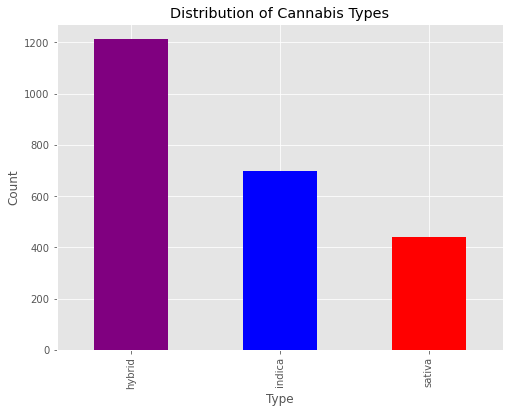

In [26]:
# Define the color palette
color_palette = {'indica': 'blue', 'hybrid': 'purple', 'sativa': 'red'}

# Count the occurrences of each type
type_counts = df['Type'].value_counts()

# Plot the distribution of types
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color=[color_palette.get(t, 'gray') for t in type_counts.index])
plt.title('Distribution of Cannabis Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

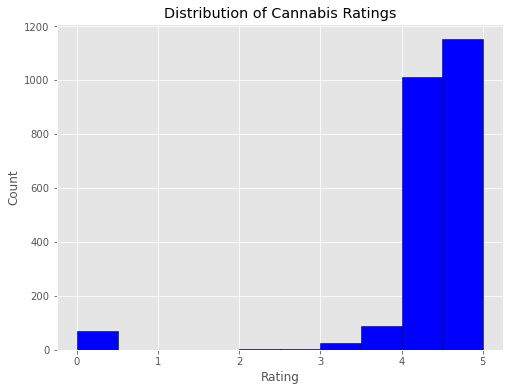

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Cannabis Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Most ratings are above 3 stars, which is great!

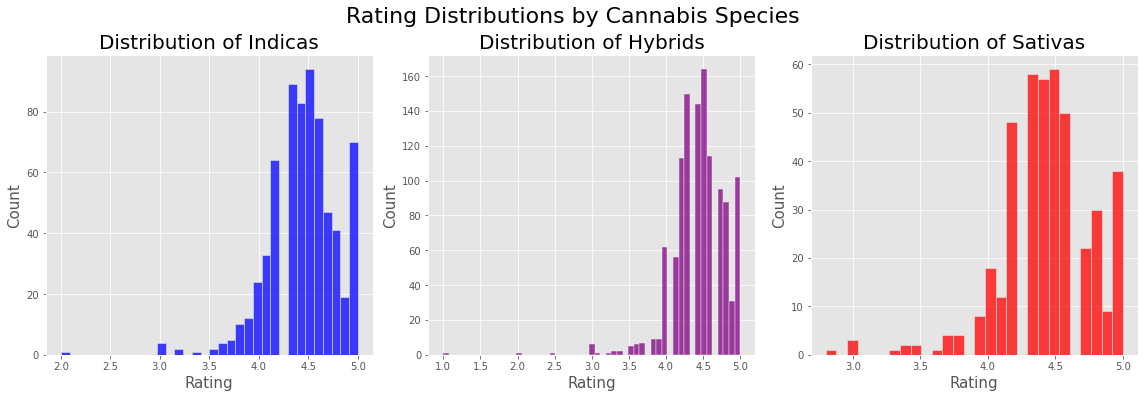

In [28]:
import seaborn as sns

plt.figure(figsize=(16, 10))
plt.suptitle('Rating Distributions by Cannabis Species', fontsize=22)

# Define the color palette for each type
color_palette = {'indica': 'blue', 'hybrid': 'purple', 'sativa': 'red'}

# Distribution of indicas
plt.subplot(231)
sns.histplot(data=df[(df.Type == 'indica') & (df.Rating > 0)], x="Rating", color=color_palette['indica'])
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Distribution of Indicas", fontsize=20)

# Distribution of hybrids
plt.subplot(232)
sns.histplot(data=df[(df.Type == 'hybrid') & (df.Rating > 0)], x="Rating", color=color_palette['hybrid'])
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Distribution of Hybrids", fontsize=20)

# Distribution of sativas
plt.subplot(233)
sns.histplot(data=df[(df.Type == 'sativa') & (df.Rating > 0)], x="Rating", color=color_palette['sativa'])
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Distribution of Sativas", fontsize=20)

plt.tight_layout()
plt.show()

# Mapping Effects to the Minor Arcana


This is where we get to the fun part. I am currently working with another creator to create a Tarot deck that is cannabis themed - the minor arcana (minus the court cards), will be different strains of weed. In order to map the effects of different cannabis strains to the minor arcana in tarot, we need to extract all of the 'effect' descriptors.

First, I want to simplify the effects / flavors fields to be lists of strings.

In [29]:
# Convert "effects" column into a list of strings
df['Effects'] = df['Effects'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['Flavor'] = df['Flavor'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
# Print the updated dataframe
print(df)

              Strain    Type  Rating  \
0             100-Og  hybrid     4.0   
1     98-White-Widow  hybrid     4.7   
2               1024  sativa     4.4   
3           13-Dawgs  hybrid     4.2   
4           24K-Gold  hybrid     4.6   
...              ...     ...     ...   
2346         Zeus-Og  hybrid     4.7   
2347        Zkittlez  indica     4.6   
2348     Zombie-Kush  indica     5.0   
2349       Zombie-Og  indica     4.4   
2350        Zoom-Pie  indica     4.6   

                                               Effects  \
0     [Creative, Energetic, Tingly, Euphoric, Relaxed]   
1       [Relaxed, Aroused, Creative, Happy, Energetic]   
2      [Uplifted, Happy, Relaxed, Energetic, Creative]   
3        [Tingly, Creative, Hungry, Relaxed, Uplifted]   
4      [Happy, Relaxed, Euphoric, Uplifted, Talkative]   
...                                                ...   
2346   [Happy, Uplifted, Relaxed, Euphoric, Energetic]   
2347      [Relaxed, Happy, Euphoric, Uplifted, Sleepy] 

In [30]:
# Filter out missing values and extract unique values from the "Effects" column
possible_descriptors = df['Effects'].dropna().explode().unique()

# Print the unique values
print(possible_descriptors)

['Creative' 'Energetic' 'Tingly' 'Euphoric' 'Relaxed' 'Aroused' 'Happy'
 'Uplifted' 'Hungry' 'Talkative' 'None' 'Giggly' 'Focused' 'Sleepy' 'Dry'
 'Mouth']


Woot! Next we need to map each card to at least 2 of these effects, just to narrow down our search. Then, lets see how many results we have for each card.

In [31]:
def find_matching_strains(card, mapped_effects, df, top_n=5):
    scores = []
    for index, row in df.iterrows():
        strain_effects = set(row['Effects'])
        card_effects = set(mapped_effects)
        score = len(strain_effects.intersection(card_effects))
        scores.append((row['Strain'], row['Description'], score))
    
    sorted_scores = sorted(scores, key=lambda x: x[2], reverse=True)
    top_strains = [(score[0], score[1]) for score in sorted_scores[:top_n]]
    total_matches = len([score for score in scores if score[2] > 0])  # Count number of strains with at least one match
    return top_strains, total_matches

# Example usage
card = "ace of wands"
mapped_effects = ["Creative", "Energetic"]
top_strains, total_matches = find_matching_strains(card, mapped_effects, df, top_n=5)

print("Top Strains for", card + ":")
print("Total Matches:", total_matches)
for strain in top_strains:
    print("Strain:", strain[0])
    print("Description:", strain[1])
    print()

Top Strains for ace of wands:
Total Matches: 1127
Strain: 100-Og
Description: $100 OG is a 50/50 hybrid strain that packs a strong punch. The name supposedly refers to both its strength and high price when it first started showing up in Hollywood. As a plant, $100 OG tends to produce large dark green buds with few stems. Users report a strong body effect of an indica for pain relief with the more alert, cerebral feeling thanks to its sativa side.

Strain: 98-White-Widow
Description: The ‘98 Aloha White Widow is an especially potent cut of White Widow that has grown in renown alongside Hawaiian legends like Maui Wowie and Kona Gold. This White Widow phenotype reeks of diesel and skunk and has a rich earthy taste with intermittent notes of hash. Its buds are coated in trichomes, giving its dark foliage a lustrous glint to go along with its room-filling odor. This one-hitter-quitter uplifts the mind with mind-bending euphoria that materializes in the body as airy relaxation. ‘98 Aloha Whi

Oof. 1127 matches, lets see what else we can do to find a good match for each card.

In [32]:
def find_matching_strains(card, category, df, top_n=5):
    scores = []
    if 'Type' not in df.columns:
        print("Error: 'Type' column not found in the dataframe.")
        return [], 0
    
    for index, row in df.iterrows():
        strain_category = row['Type']
        if strain_category == category:
            scores.append((row['Strain'], row['Description']))
    
    top_strains = scores[:top_n]
    total_matches = len(scores)
    return top_strains, total_matches

# Example usage
card = "one of wands"
category = "sativa"
top_strains, total_matches = find_matching_strains(card, category, df, top_n=5)

print("Top Strains for", card + ":")
print("Total Matches:", total_matches)
for strain in top_strains:
    print("Strain:", strain[0])
    print("Description:", strain[1])
    print()

Top Strains for one of wands:
Total Matches: 440
Strain: 1024
Description: 1024 is a sativa-dominant hybrid bred in Spain by Medical Seeds Co. The breeders claim to guard the secret genetics due to security reasons, but regardless of its genetic heritage, 1024 is a THC powerhouse with a sweet and spicy bouquet. Subtle fruit flavors mix with an herbal musk to produce uplifting sativa effects. One specific phenotype is noted for having a pungent odor that fills a room, similar to burning incense.

Strain: 3D-Cbd
Description: 3D CBD from Snoop Dogg’s branded line of cannabis strains was crafted with patients in mind. With a THC:CBD ratio of about 5:8, this earthy-flavored sativa is preferred for treating pain, inflammation, and muscle tension. Consumers susceptible to THC-induced anxiety may also appreciate the sobering, relaxing balance CBD has to offer.

Strain: Acapulco-Gold
Description: One of the most well-known strains, Acapulco Gold has been likened to dinner at a five-star restaur

Better! We are down to 440 matches. Lets try only using 5 star matches, and perhaps give it one more effect to work with.

In [33]:
def find_matching_strains(card, category, df, top_n=5):
    scores = []
    if 'Type' not in df.columns or 'Rating' not in df.columns:
        print("Error: 'Type' or 'Rating' column not found in the dataframe.")
        return [], 0
    
    for index, row in df.iterrows():
        strain_category = row['Type']
        strain_rating = row['Rating']
        if strain_category == category and strain_rating == 5:
            scores.append((row['Strain'], row['Description']))
    
    top_strains = scores[:top_n]
    total_matches = len(scores)
    return top_strains, total_matches

# Example usage
card = "one of wands"
category = "sativa"
top_strains, total_matches = find_matching_strains(card, category, df, top_n=5)

print("Top Strains for", card + ":")
print("Total Matches:", total_matches)
for strain in top_strains:
    print("Strain:", strain[0])
    print("Description:", strain[1])
    print()

Top Strains for one of wands:
Total Matches: 38
Strain: Acid-Dough
Description: Acid Dough by Ripper Seeds is a sativa-dominant strain with energetic effects. Created by crossing Lilly (Queen Mother x Congo) x OG Badazz, this strain offers sweet, candy-like aromas with bright pineapple flavors and a generous yield. Acid Dough has an approximate 65-70 day flowering time and colorful foliage. This strain responds well to cold temperatures during the finishing process, creating buds with deep violet hues and extra resin production. Acid Dough won 2nd Place Best Sativa at the 2017 Spannabis Champions Cups and 2nd Place at the 2016 Expogrow Cup. 

Strain: Alpha-Cow
Description: Alpha Cow is a sativa strain that brings together genetics from Alpha Blue and Purple Cow. Its aroma is a distinctive mix of overripe blueberries and sweet toffee, while the exhale accentuates its smooth berry flavors. Some sativas tend to bring on racing thoughts, but this strain provides a calming buzz with mellow 

Ok, last stitch effort, it'd be fun to match the possible Flavors to the description of the card. I'll use ChatGPT to do this (since it 1. doesn't actually matter, 2. is a lot of work I dont' care to do.)

In [34]:
def find_matching_strains(card, category, df, top_n=5):
    scores = []
    if 'Type' not in df.columns or 'Rating' not in df.columns:
        print("Error: 'Type' or 'Rating' column not found in the dataframe.")
        return [], 0
    
    for index, row in df.iterrows():
        strain_category = row['Type']
        strain_rating = row['Rating']
        if strain_category == category and strain_rating >= 4.5:
            scores.append((row['Strain'], row['Description']))
    
    top_strains = scores[:top_n]
    total_matches = len(scores)
    return top_strains, total_matches

# Example usage
card = "one of wands"
category = "sativa"
top_strains, total_matches = find_matching_strains(card, category, df, top_n=5)

print("Top Strains for", card + ":")
print("Total Matches:", total_matches)
for strain in top_strains:
    print("Strain:", strain[0])
    print("Description:", strain[1])
    print()

Top Strains for one of wands:
Total Matches: 208
Strain: 3D-Cbd
Description: 3D CBD from Snoop Dogg’s branded line of cannabis strains was crafted with patients in mind. With a THC:CBD ratio of about 5:8, this earthy-flavored sativa is preferred for treating pain, inflammation, and muscle tension. Consumers susceptible to THC-induced anxiety may also appreciate the sobering, relaxing balance CBD has to offer.

Strain: Acapulco-Gold
Description: One of the most well-known strains, Acapulco Gold has been likened to dinner at a five-star restaurant. The strain comes from the areas in and around Acapulco, Mexico. Its orange hairs resemble a gold nugget, with gold, green, and brown colors of resin collecting on the buds. An aroma of burnt toffee lingers when the bud is broken up. Acapulco Gold has a reputation for being one of the best cannabis strains ever created, and is becoming more difficult to find due to more growers moving indoors. 

Strain: Acid-Dough
Description: Acid Dough by Rip

Not quite. Lets adapt our criteria to check for matching effects and flavor, but be more lenient on the Type of strain. (Lets also print out the matching criteria)

In [105]:
import pandas as pd
from difflib import get_close_matches

def find_matching_strains(card, tarot_df, df, n=5):
    # Find the card strain
    card_strain = tarot_df[tarot_df['Card'] == card.lower()]

    if not card_strain.empty:
        # Extract the criteria from the card
        effects = card_strain['Effect1'].values[0:2]
        flavor = card_strain['Flavor'].values[0]
        strain_type = card_strain['Type'].values[0]

        # Filter strains with matching effects, flavor, and type
        matching_strains = df[
            (df['Effects'].apply(lambda x: all(effect in x for effect in effects)))
            & (df['Flavor'].apply(lambda x: flavor in x))
            & (df['Type'].str.lower() == strain_type.lower())
        ]

        if not matching_strains.empty:
            # Sort strains based on their ratings
            sorted_strains = matching_strains.sort_values('Rating', ascending=False)

            return sorted_strains.head(n)

        # If no exact match, find closest matching strains
        matching_effects_flavor = df[
            (df['Effects'].apply(lambda x: all(effect in x for effect in effects)))
            & (df['Flavor'].apply(lambda x: flavor in x))
        ]

        if not matching_effects_flavor.empty:
            # Sort strains based on their ratings
            sorted_strains = matching_effects_flavor.sort_values('Rating', ascending=False)

            return sorted_strains.head(n)

        # If still no match, find closest matching strain type
        matching_effects = df[
            (df['Effects'].apply(lambda x: all(effect in x for effect in effects[0:1])))
        ]

        if not matching_effects.empty:
            # Sort strains based on their ratings
            sorted_strains = matching_effects.sort_values('Rating', ascending=False)

            return sorted_strains.head(n)

        # If still no match, find closest matching strains based on strain name
        all_strain_names = df['Strain'].tolist()
        closest_matches = get_close_matches(card, all_strain_names, n=n)

        if closest_matches:
            closest_matching_strains = df[df['Strain'].isin(closest_matches)]

            return closest_matching_strains

    return pd.DataFrame()

Heyo, that's more like it!

Now, I can work with my stakeholders of this tarot deck to correctly assign the Minor arcana to a strain of cannabis. Mission Success boys.

This means that the last thing we want to do is to output the resulting strais for each card into a csv file to be reviewed and finalized:

In [106]:
# Create an empty DataFrame to store the results
output_df = pd.DataFrame(columns=['Card', 'Strain', 'Matching Criteria', 'Description'])

# Loop through each card in tarot_df
for _, card_row in tarot_df.iterrows():
    card = card_row['Card']
    top_strains = find_matching_strains(card, tarot_df, df, n=5)

    if not top_strains.empty:
        for _, strain in top_strains.iterrows():
            matching_criteria = ', '.join(strain['Effects'][0:2] + strain['Flavor'] + [strain['Type']])
            output_df = output_df.append({
                'Card': card,
                'Strain': strain['Strain'],
                'Matching Criteria': matching_criteria,
                'Description': strain['Description']
            }, ignore_index=True)

# Write the results to output.csv
output_df.to_csv('output.csv', index=False)

print("Output file 'output.csv' has been created successfully.")

Output file 'output.csv' has been created successfully.


yay! see data science can be ...... maybe not 'fun' is the word id use, but you can do fun things with it :> 11/10 worth it.

I am happy with the results of our fruit's labor

STAY TUNED FOR A WEED THEMED TAROT DECK 